In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [19]:

n_clusters = 3  # Example for 2 clusters

def get_kmeans_clustering(n_clusters,reshaped_data):
    #scaler = StandardScaler()
    #scaled_data = scaler.fit_transform(reshaped_data)


    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)

    # Fit the model to your reshaped image data
    kmeans.fit(reshaped_data)

    # Get the cluster labels for each image


    ## Print the cluster labels
    #print(f'Cluster labels: {cluster_labels}')

    # Optionally: reshape the labels to match the original image format for visualization
    # Example: Assuming each image was originally 2D (height, width)
    # For each image, you can now inspect which cluster it belongs to

    return kmeans

In [20]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

def get_paths(i):
    paths = {
    'path_3d': f'/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D/split_{i+1}.nc',
    'path_2d': f'/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_{i+1}.nc',
    'path_1d': f'/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_{i+1}.nc'
    }
    return paths

for i in range(10):
    paths=get_paths(i)
    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path=f'/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_{i}')
    simu_list.append(simu)

****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_0/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_1/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_2/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_3/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_4/RCE_T300_U0_B1_M1
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_5/RCE_T300_U0_B1_M1
B No dataset found: dataset_computed_2d
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_6/RCE_T300_U0_B1_M1
B No dataset found: dataset_computed_2d
****/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_split_7/RCE_T300_U0_B1_M1
B No dataset found: dataset_computed_2d
****/home/ec2-user/DeepCloudLab/processed_classes/long_r

In [21]:
##diagram on all the domain

In [80]:
array_isentropic_all=[]

for i, simu in enumerate(simu_list[:-1]):
    new_variable = simu.dataset_isentropic.RHO_W_max.values  # Extract the new variabl
    array_isentropic_all.append(new_variable)

array_isentropic_all=np.array(array_isentropic_all)
reshaped_data = array_isentropic_all.reshape(-1, 64, 50)


In [81]:
import numpy as np

# Reshape and replace NaN values with zeros (or another fill value)
reshaped_data = np.nan_to_num(reshaped_data)
print('Shape:', reshaped_data.shape)

# Compute mean and std across the correct axis
mean_norm_data = reshaped_data.mean(axis=0)
std_norm_data = reshaped_data.std(axis=0)

print('Mean:', mean_norm_data.shape)
print('Mean overall:', reshaped_data.mean())
print('Std overall:', reshaped_data.std())

# Avoid division by zero by adding a small epsilon to std when it's zero
epsilon = 1e-10
std_norm_data = np.where(std_norm_data == 0, epsilon, std_norm_data)

# Normalize the data
reshaped_data = (reshaped_data - mean_norm_data) / std_norm_data

# Reshape the data as needed (back to 2D form if necessary)
reshaped_data = reshaped_data.reshape((reshaped_data.shape[0], -1))

print('Normalized data shape:', reshaped_data.shape)


Shape: (4320, 64, 50)
Mean: (64, 50)
Mean overall: 0.2509682392049857
Std overall: 1.6682060965854044
Normalized data shape: (4320, 3200)


In [55]:
n_clusters=4
kmeans_all_domain_data = get_kmeans_clustering(n_clusters=n_clusters,reshaped_data=reshaped_data)
cluster_labels_all_domain_data = kmeans_all_domain_data.labels_

# If you want to inspect the cluster centers
cluster_centers_all_domain_data = kmeans_all_domain_data.cluster_centers_

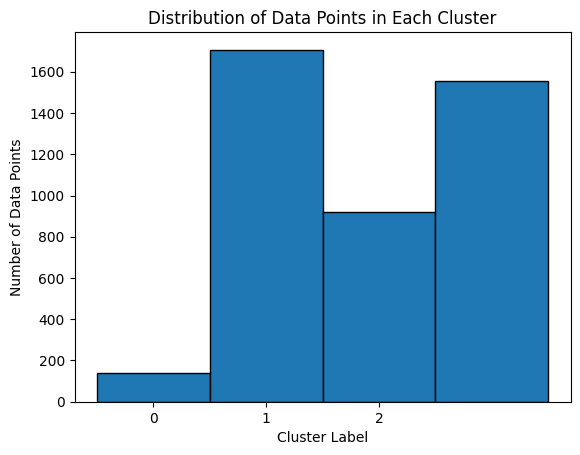

In [56]:
import matplotlib.pyplot as plt

# Plot a histogram of the cluster labels
plt.hist(cluster_labels_all_domain_data, bins=np.arange(n_clusters+1), edgecolor='black', align='left')

# Add labels and title
plt.title('Distribution of Data Points in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')

plt.xticks([0, 1,2])  # Ensure the x-axis ticks match the clusters

plt.show()

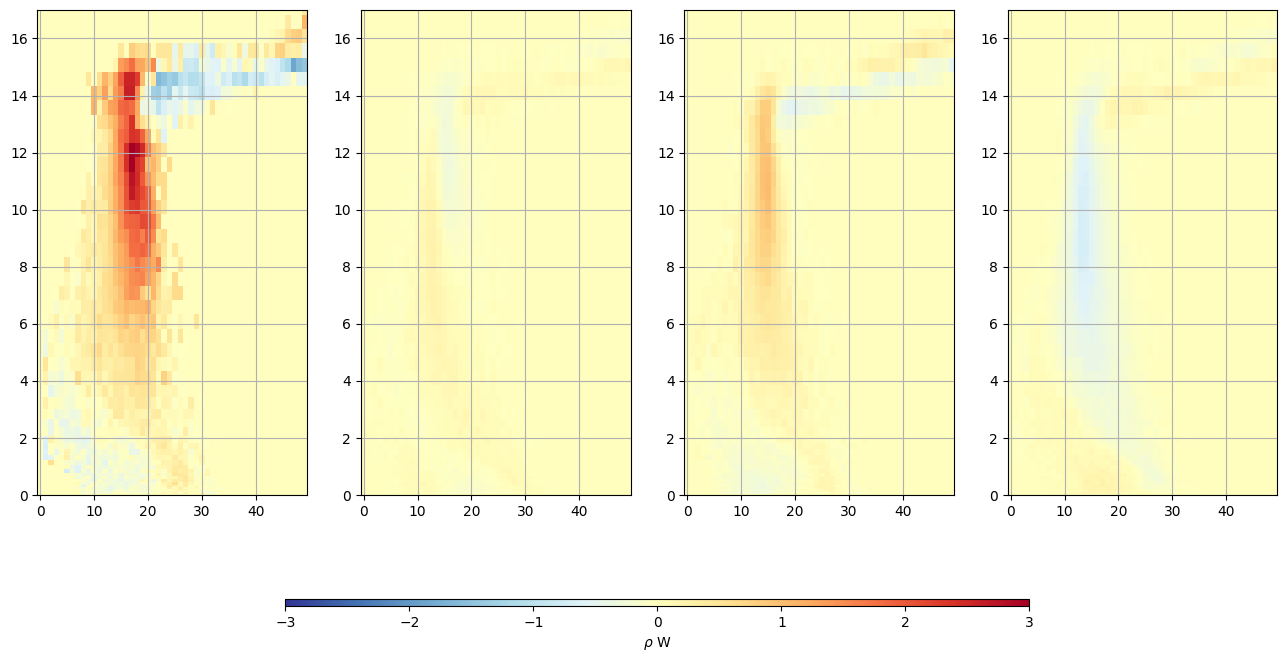

In [71]:
fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[1].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
fig, ax = plt.subplots(1,n_clusters, figsize=(16,9))
idx_cluster = [np.where(cluster_labels_all_domain_data==i)[0][0] for i in range(n_clusters)]
for i_sub in range(n_clusters):
    data = cluster_centers_all_domain_data[i_sub].reshape(64,50)
    pcm= ax[i_sub].pcolormesh(XX,ZZ,data ,cmap='RdYlBu_r', vmin=-3, vmax=3)#, vmin=-2, vmax=2)
    #ax[i_sub].colorbar()
    ax[i_sub].grid(True)
    ax[i_sub].set_ylim(0,17)
fig.colorbar(pcm, ax=ax[:], orientation='horizontal', aspect=110, shrink=0.6, label=r'$\rho$ W')  # or 'horizontal' for horizontal colorbar

    #plt.show()


In [ ]:
fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[1].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
fig, ax = plt.subplots(1,n_clusters, figsize=(16,9))
idx_cluster = [np.where(cluster_labels_all_domain_data==i)[0][0] for i in range(n_clusters)]
for i_sub, idx in enumerate(idx_cluster):
    data = reshaped_data[idx].reshape(64,50)
    pcm= ax[i_sub].pcolormesh(XX,ZZ,data ,cmap='RdYlBu_r', vmin=-3, vmax=3)#, vmin=-2, vmax=2)
    #ax[i_sub].colorbar()
    ax[i_sub].grid(True)
    ax[i_sub].set_ylim(0,17)
fig.colorbar(pcm, ax=ax[:], orientation='horizontal', aspect=110, shrink=0.6, label=r'$\rho$ W')  # or 'horizontal' for horizontal colorbar

    #plt.show()


In [82]:
import h5py
import pickle

with h5py.File('reshaped_data_all_domain.h5', 'w') as f:
    f.create_dataset('data', data=reshaped_data)

with open('kmeans_model_all_domain.pkl', 'wb') as file:
    pickle.dump(kmeans_all_domain_data, file)

In [51]:
### isentropic diagram on a subdomain

In [6]:
from pySAMetrics.diagnotic_fmse import find_most_variable_subdomain_via_filter_fast, subdomain_indices, diagnostic_fmse_z

In [7]:
nx_sub, ny_sub = 64, 64
nx, ny = 128, 128
all_sub_indices_simu=[]
for i_simu in tqdm(range(6)):
    fmse_array = simu_list[i_simu].dataset_computed_3d.FMSE.values
    all_sub_indices = []
    for t in tqdm(range(480)):
        all_sub_indices.append([])
        fmse_array_i = fmse_array[t]
        for z_idx in range(64):
            fmse_slice = fmse_array_i[z_idx]
            (x_center, y_center), _ =find_most_variable_subdomain_via_filter_fast(array_2d=fmse_slice, nx_sub=nx_sub, ny_sub=ny_sub,  pad=3)
            sub = subdomain_indices(x_center, y_center, nx_sub, ny_sub, nx, ny)
            all_sub_indices[-1].append(sub)
    all_sub_indices_simu.append(all_sub_indices)

100%|██████████| 6/6 [02:25<00:00, 24.25s/it]


In [8]:
all_sub_indices_simu=np.array(all_sub_indices_simu)

In [9]:
all_diag_reduced_simu=[]
for i_simu in tqdm(range(6)):
    all_sub_indices = all_sub_indices_simu[i_simu]
    fmse_array = simu_list[i_simu].dataset_computed_3d.FMSE.values
    rho_w_array = simu_list[i_simu].dataset_computed_3d.RHO_W.values
    fmse_sub = np.zeros((480, 64, nx_sub, ny_sub))
    rho_w_sub = np.zeros((480, 64, nx_sub, ny_sub))

    for t in tqdm(range(480)):
        for z in range(64):
            fmse_select = fmse_array[t, z][np.ix_(all_sub_indices[t, z,0],all_sub_indices[t, z,1])]
            fmse_sub[t, z]=fmse_select

            rho_w_select = rho_w_array[t, z][np.ix_(all_sub_indices[t, z,0],all_sub_indices[t, z,1])]
            rho_w_sub[t, z]=rho_w_select
    diag_reduces_i_simu =[]
    for i_t in tqdm(range(480)):
        diag_reduced_window = diagnostic_fmse_z(
            fmse_array=fmse_sub,
            z_array=simu_list[i_simu].dataset_3d.z.values,
            data_array=rho_w_sub,
            time_step=i_t,
            bin_mode='max'
        )
        diag_reduces_i_simu.append(diag_reduced_window)
    diag_reduces_i_simu = np.array(diag_reduces_i_simu)
    all_diag_reduced_simu.append(diag_reduces_i_simu)

100%|██████████| 6/6 [07:16<00:00, 72.68s/it]


In [58]:
all_diag_reduced_simu = np.array(all_diag_reduced_simu)
n_sim, nt, nz, nf = all_diag_reduced_simu.shape
reshaped_data = all_diag_reduced_simu.reshape(n_sim*nt, nz*nf)

In [59]:
import numpy as np

# Reshape and replace NaN values with zeros (or another fill value)
reshaped_data = np.nan_to_num(reshaped_data)
print('Shape:', reshaped_data.shape)

# Compute mean and std across the correct axis
mean_norm_data = reshaped_data.mean(axis=0)
std_norm_data = reshaped_data.std(axis=0)

print('Mean:', mean_norm_data.shape)
print('Mean overall:', reshaped_data.mean())
print('Std overall:', reshaped_data.std())

# Avoid division by zero by adding a small epsilon to std when it's zero
epsilon = 1e-10
std_norm_data = np.where(std_norm_data == 0, epsilon, std_norm_data)

# Normalize the data
#reshaped_data = (reshaped_data - mean_norm_data) / std_norm_data


# Reshape the data as needed (back to 2D form if necessary)
reshaped_data = reshaped_data.reshape((reshaped_data.shape[0], -1))

print('Normalized data shape:', reshaped_data.shape)


Shape: (2880, 3200)
Mean: (3200,)
Mean overall: 0.12758174091821056
Std overall: 1.1721346527010585
Normalized data shape: (2880, 3200)


In [65]:
n_clusters=4
kmeans_subdomain_data = get_kmeans_clustering(n_clusters=n_clusters,reshaped_data=reshaped_data)
cluster_labels_subdomain_data = kmeans_subdomain_data.labels_

# If you want to inspect the cluster centers
cluster_centers_subdomain_data = kmeans_subdomain_data.cluster_centers_

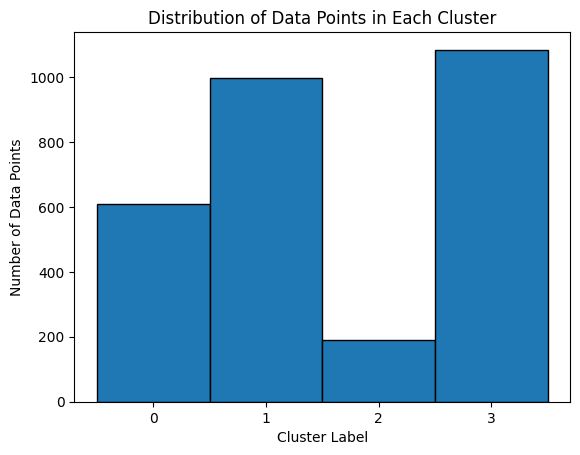

In [66]:
import matplotlib.pyplot as plt

# Plot a histogram of the cluster labels
plt.hist(cluster_labels_subdomain_data, bins=np.arange(n_clusters+1), edgecolor='black', align='left')

# Add labels and title
plt.title('Distribution of Data Points in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')

plt.xticks(np.arange(n_clusters))  # Ensure the x-axis ticks match the clusters

plt.show()

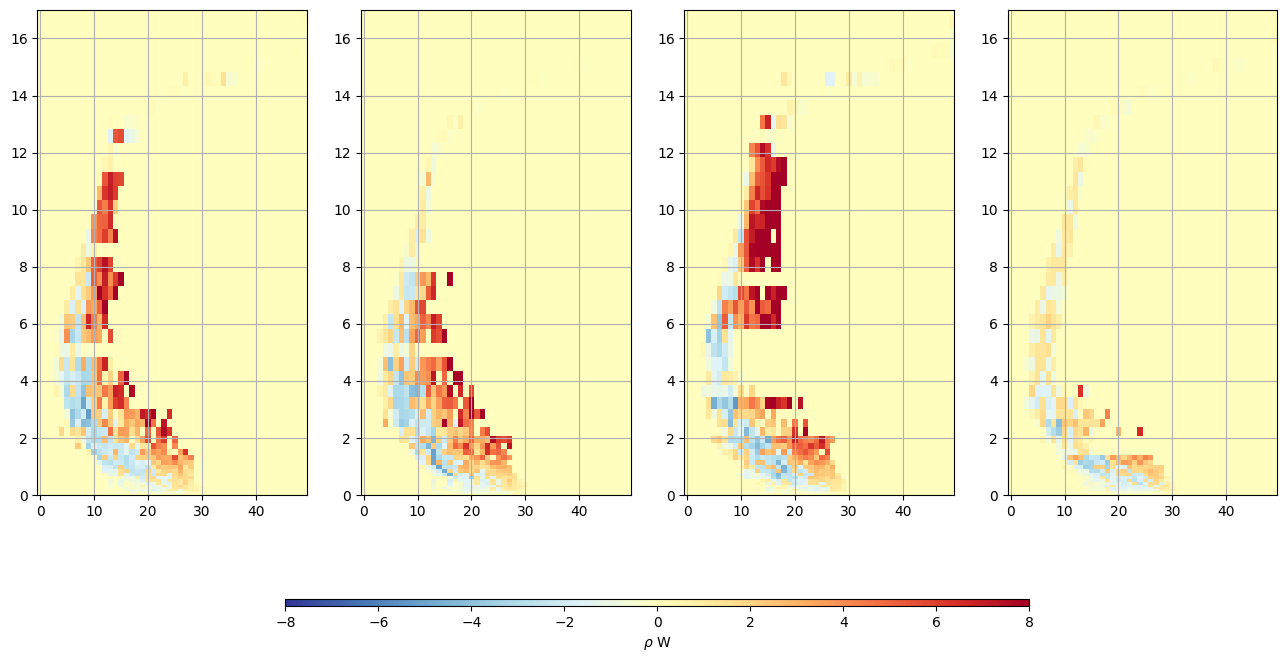

In [69]:
fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[1].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
fig, ax = plt.subplots(1,n_clusters, figsize=(16,9))
idx_cluster = [np.where(cluster_labels_subdomain_data==i)[0][0] for i in range(n_clusters)]
for i_sub, idx in enumerate(idx_cluster):
    data = reshaped_data[idx].reshape(64,50)
    pcm= ax[i_sub].pcolormesh(XX,ZZ,data ,cmap='RdYlBu_r', vmin=-8, vmax=8)#, vmin=-2, vmax=2)
    #ax[i_sub].colorbar()
    ax[i_sub].grid(True)
    ax[i_sub].set_ylim(0,17)
fig.colorbar(pcm, ax=ax[:], orientation='horizontal', aspect=110, shrink=0.6, label=r'$\rho$ W')  # or 'horizontal' for horizontal colorbar

    #plt.show()


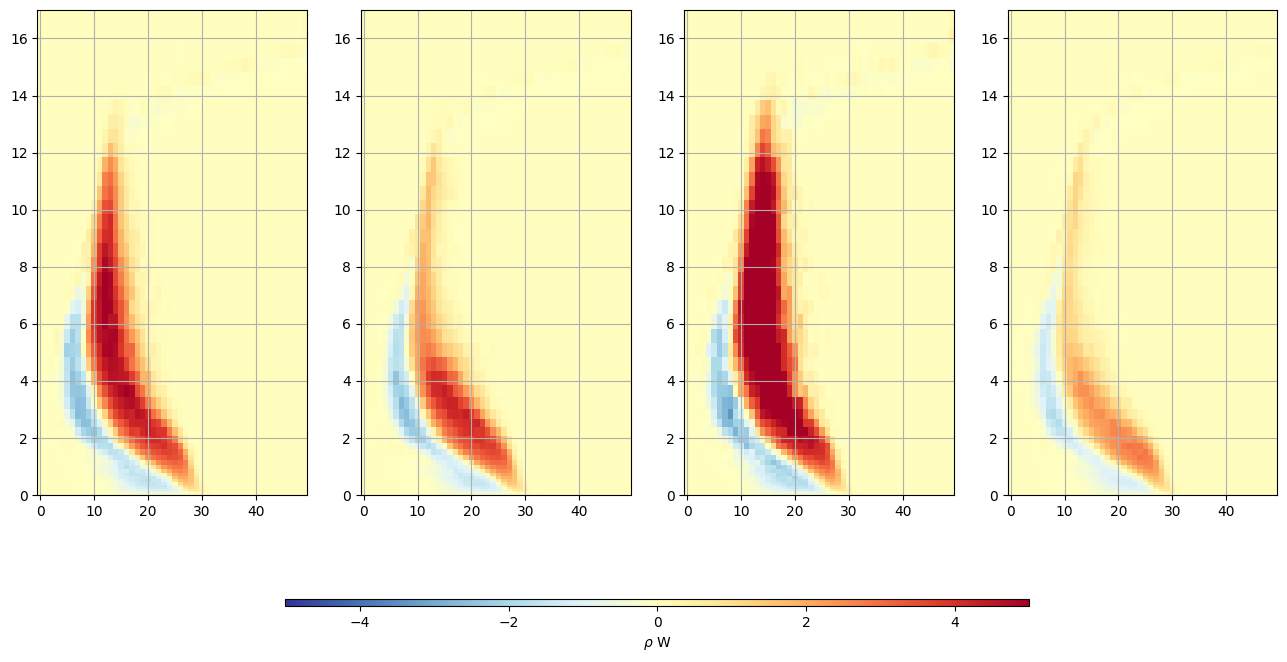

In [74]:
fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[1].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)
fig, ax = plt.subplots(1,n_clusters, figsize=(16,9))
idx_cluster = [np.where(cluster_labels_all_domain_data==i)[0][0] for i in range(n_clusters)]
for i_sub in range(n_clusters):
    data = cluster_centers_subdomain_data[i_sub].reshape(64,50)
    pcm= ax[i_sub].pcolormesh(XX,ZZ,data ,cmap='RdYlBu_r', vmin=-5, vmax=5)#, vmin=-2, vmax=2)
    #ax[i_sub].colorbar()
    ax[i_sub].grid(True)
    ax[i_sub].set_ylim(0,17)
fig.colorbar(pcm, ax=ax[:], orientation='horizontal', aspect=110, shrink=0.6, label=r'$\rho$ W')  # or 'horizontal' for horizontal colorbar

    #plt.show()


In [75]:
###store study

In [79]:
import h5py
import pickle

with h5py.File('reshaped_data_subdomain.h5', 'w') as f:
    f.create_dataset('data', data=reshaped_data)

with open('kmeans_model_subdomain.pkl', 'wb') as file:
    pickle.dump(kmeans_subdomain_data, file)

NameError: name 'pickle' is not defined